In [97]:
import pandas as pd
import numpy as np

# 1.Data Preparation

In [98]:
def load_csv(path, date_col="Date"):
    df = pd.read_csv(path, parse_dates=[date_col], index_col=date_col).dropna()
    return df

In [99]:
df_bnb = load_csv("crypto/BNB-USD.csv")
df_btc = load_csv("crypto/BTC-USD.csv")
df_eth = load_csv("crypto/ETH-USD.csv")
df_usdc = load_csv("crypto/USDC-USD.csv")
df_usdt = load_csv("crypto/USDT-USD.csv")
df_usdt.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-09,1.01087,1.01327,0.996515,1.00818,1.00818,3.581880e+08
2017-11-10,1.00650,1.02423,0.995486,1.00601,1.00601,7.564460e+08
2017-11-11,1.00598,1.02621,0.995799,1.00899,1.00899,7.462280e+08
2017-11-12,1.00602,1.10591,0.967601,1.01247,1.01247,1.466060e+09
2017-11-13,1.00448,1.02929,0.975103,1.00935,1.00935,7.678840e+08


### Loading macro variables

In [100]:
df_euro_r = load_csv("macros/euro exchnage rate data.csv")
df_fed_r = load_csv("macros/Fed_interest_rate.csv", date_col="DATE")
df_gold = load_csv("macros/gold price.csv")
df_sp500 = load_csv("macros/S&p_500_index.csv")
df_sp500.head()

,Open,High,Low,Close
Date,,,,
2017-01-03,2251.57,2263.88,2245.13,2257.83
2017-01-04,2261.60,2272.82,2261.60,2270.75
2017-01-05,2268.18,2271.50,2260.45,2269.00
2017-01-06,2271.14,2282.10,2264.06,2276.98
2017-01-09,2273.59,2275.49,2268.90,2268.90


# 2. Feature Engineering

### Create crypto returns

In [101]:
# these are lags we use to calculate return (10 lags that capture short and long term past returns)
lags = {
    "5d":5,
    "2w":14,
    "3w":21,
    "1m":30,
    "2m":30*2,
    "3m":30*3,
    "6m":30*6,
    "9m":30*9,
    "1y":30*12,
    "2y":30*12*2
}

In [102]:
def calculate_returns(df_returns, df_stock, stock_label):
    for lag_label, lag in lags.items(): 
        df_returns[f"return_{stock_label}_{lag_label}"] = df_stock["Adj Close"].pct_change(lag).add(1).pow(1/lag).sub(1).dropna()

In [103]:
df_returns=pd.DataFrame()
calculate_returns(df_returns, df_bnb, "bnb")
calculate_returns(df_returns, df_btc, "btc")
calculate_returns(df_returns, df_eth, "eth")
calculate_returns(df_returns, df_usdc, "usdc")
calculate_returns(df_returns, df_usdt, "usdt")
df_returns = df_returns.dropna()

In [104]:
df_returns.head()

,return_bnb_5d,return_bnb_2w,return_bnb_3w,return_bnb_1m,return_bnb_2m,return_bnb_3m,return_bnb_6m,return_bnb_9m,return_bnb_1y,return_bnb_2y,...,return_usdt_5d,return_usdt_2w,return_usdt_3w,return_usdt_1m,return_usdt_2m,return_usdt_3m,return_usdt_6m,return_usdt_9m,return_usdt_1y,return_usdt_2y
Date,,,,,,,,,,,,,,,,,,,,,
2020-09-27,0.016838,-0.012080,0.005825,0.004156,0.004598,0.005845,0.004083,0.002407,0.001419,0.001270,...,0.000008,0.000162,-0.000064,-0.000018,-0.000018,-0.000006,-8.541802e-06,0.000006,-0.000010,0.000008
2020-09-28,0.033721,-0.010279,0.008912,0.005317,0.004991,0.006240,0.004177,0.002700,0.001495,0.001327,...,0.000040,-0.000012,0.000028,-0.000057,-0.000012,0.000014,-2.007980e-05,-0.000002,-0.000021,0.000006
2020-09-29,0.032220,0.004192,0.010442,0.006646,0.005570,0.006689,0.004409,0.002772,0.001687,0.001427,...,-0.000083,-0.000116,-0.000008,-0.000011,0.000012,-0.000008,7.605140e-07,-0.000012,-0.000003,0.000010
2020-09-30,0.034989,0.003315,0.008482,0.007811,0.005143,0.007069,0.004365,0.002767,0.001797,0.001594,...,-0.000021,-0.000148,-0.000035,-0.000061,0.000073,-0.000158,-1.930363e-06,-0.000023,-0.000030,0.000012
2020-10-01,0.009069,0.001153,0.005280,0.003338,0.004507,0.006514,0.003814,0.002465,0.001475,0.001470,...,-0.000226,-0.000084,-0.000036,-0.000108,0.000048,0.000013,-1.892098e-05,-0.000020,-0.000022,0.000009


In [105]:
df_returns.describe()

,return_bnb_5d,return_bnb_2w,return_bnb_3w,return_bnb_1m,return_bnb_2m,return_bnb_3m,return_bnb_6m,return_bnb_9m,return_bnb_1y,return_bnb_2y,...,return_usdt_5d,return_usdt_2w,return_usdt_3w,return_usdt_1m,return_usdt_2m,return_usdt_3m,return_usdt_6m,return_usdt_9m,return_usdt_1y,return_usdt_2y
count,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,...,578.000000,578.000000,578.000000,578.000000,578.000000,5.780000e+02,5.780000e+02,578.000000,5.780000e+02,5.780000e+02
mean,0.005238,0.004929,0.004941,0.005009,0.005002,0.005145,0.005604,0.005599,0.005530,0.003722,...,-0.000002,-0.000002,-0.000002,-0.000003,-0.000003,-2.120989e-06,-2.418726e-06,-0.000002,-3.556568e-06,-3.415723e-06
std,0.029024,0.019401,0.016645,0.014296,0.010802,0.009413,0.005605,0.004329,0.003356,0.001033,...,0.000201,0.000071,0.000050,0.000037,0.000025,1.861262e-05,1.213492e-05,0.000013,1.122728e-05,1.139130e-05
min,-0.123410,-0.063847,-0.040178,-0.022882,-0.014145,-0.008191,-0.001947,-0.002145,-0.001316,0.001270,...,-0.002272,-0.000811,-0.000542,-0.000389,-0.000312,-2.113551e-04,-1.043126e-04,-0.000191,-1.441026e-04,-7.184706e-05
25%,-0.007831,-0.004561,-0.003418,-0.003124,-0.000841,-0.000218,0.001317,0.001572,0.001941,0.003068,...,-0.000066,-0.000027,-0.000020,-0.000017,-0.000008,-7.095727e-06,-4.768190e-06,-0.000004,-6.076408e-06,-8.412316e-06
50%,0.003043,0.002973,0.002356,0.002505,0.002608,0.003024,0.003510,0.004121,0.007293,0.003996,...,-0.000006,-0.000001,-0.000001,-0.000002,-0.000002,-3.887310e-07,-6.579208e-07,-0.000001,-1.853356e-06,-3.427013e-06
75%,0.015222,0.011049,0.010387,0.009713,0.007082,0.005469,0.011161,0.009591,0.008311,0.004500,...,0.000050,0.000023,0.000014,0.000012,0.000005,4.329751e-06,1.895559e-06,0.000002,8.526261e-07,7.593089e-07
max,0.195113,0.120252,0.102502,0.070900,0.039647,0.031076,0.018064,0.013247,0.010477,0.005379,...,0.002308,0.000599,0.000517,0.000351,0.000184,1.227867e-04,5.895396e-05,0.000096,7.204253e-05,4.788566e-05


### Prepare macro_variables

In [106]:
df_factors = pd.DataFrame()

In [107]:
df_sp500[" Close"].pct_change(5).add(1).pow(1/5).sub(1).dropna()

Date
2017-01-10    0.000979
2017-01-11    0.000402
2017-01-12    0.000127
2017-01-13   -0.000206
2017-01-17   -0.000089
                ...   
2022-04-28   -0.004880
2022-04-29   -0.006635
2022-05-02   -0.006640
2022-05-03    0.000013
2022-05-04    0.005494
Name:  Close, Length: 1339, dtype: float64

In [108]:
df_factors["return_gold_5d"] = df_gold["Close/Last"].pct_change(5).add(1).pow(1/5).sub(1).dropna()
df_factors["euro_r"] = df_euro_r[" Close"]/100
df_factors["fed_dff"] = df_fed_r["DFF"]/100
df_factors["return_sp500_5d"] = df_sp500[" Close"].pct_change(5).add(1).pow(1/5).sub(1).dropna()
df_factors = df_factors.dropna()
df_factors.describe()

,return_gold_5d,euro_r,fed_dff,return_sp500_5d
count,1254.000000,1254.000000,1254.000000,1254.000000
mean,-0.000329,0.011542,0.010485,0.000457
std,0.004089,0.000415,0.008994,0.004991
min,-0.022821,0.010499,0.000400,-0.038835
25%,-0.002487,0.011211,0.000900,-0.001286
50%,-0.000546,0.011546,0.011600,0.000950
75%,0.001708,0.011842,0.019000,0.002947
max,0.024251,0.012507,0.024500,0.032599


### Calculate factor betas

* The objective is to calculate factor betas for each stock and include them as features for our machine learning model later

In [109]:
df_return_bnb = pd.DataFrame()
calculate_returns(df_returns=df_return_bnb, df_stock=df_bnb, stock_label="bnb")
df_return_bnb.head()

,return_bnb_5d,return_bnb_2w,return_bnb_3w,return_bnb_1m,return_bnb_2m,return_bnb_3m,return_bnb_6m,return_bnb_9m,return_bnb_1y,return_bnb_2y
Date,,,,,,,,,,
2017-11-14,-0.043652,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-15,-0.031584,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-16,-0.011335,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-17,-0.001231,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-18,-0.001462,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [110]:
from statsmodels.regression.rolling import RollingOLS
import statsmodels.api as sm

In [111]:
df_factors_bnb = df_factors.join(df_return_bnb["return_bnb_5d"]).dropna().sort_index()

In [112]:
betas_bnb = (RollingOLS(endog=df_factors_bnb.return_bnb_5d,
    exog=sm.add_constant(df_factors_bnb.drop("return_bnb_5d", axis=1)),
     window=60)
     .fit(params_only=True)
     .params
     .drop('const', axis=1))

betas_bnb = betas_bnb.fillna(betas_bnb.mean())
betas_bnb

,return_gold_5d,euro_r,fed_dff,return_sp500_5d
Date,,,,
2017-11-14,-0.471801,-14.724381,-15.052453,1.182115
2017-11-15,-0.471801,-14.724381,-15.052453,1.182115
2017-11-16,-0.471801,-14.724381,-15.052453,1.182115
2017-11-17,-0.471801,-14.724381,-15.052453,1.182115
2017-11-20,-0.471801,-14.724381,-15.052453,1.182115
...,...,...,...,...
2022-04-21,-0.365535,8.330431,0.689213,0.694077
2022-04-22,-0.372284,7.953806,0.735842,0.681546
2022-04-25,-0.363918,8.396486,0.921797,0.758655


In [113]:
betas_bnb.describe()

,return_gold_5d,euro_r,fed_dff,return_sp500_5d
count,1117.000000,1117.000000,1117.000000,1117.000000
mean,-0.471801,-14.724381,-15.052453,1.182115
std,1.454812,77.381826,66.979143,1.501438
min,-5.238175,-284.571921,-348.491220,-2.817675
25%,-1.441064,-53.514483,-28.118184,0.364514
50%,-0.570619,-2.576965,-1.281263,0.982937
75%,0.413530,42.084338,7.601323,1.667616
max,6.054736,112.799921,353.651372,5.314083


In [114]:
data_bnb = df_return_bnb.join(betas_bnb.shift()).dropna()
data_bnb

,return_bnb_5d,return_bnb_2w,return_bnb_3w,return_bnb_1m,return_bnb_2m,return_bnb_3m,return_bnb_6m,return_bnb_9m,return_bnb_1y,return_bnb_2y,return_gold_5d,euro_r,fed_dff,return_sp500_5d
Date,,,,,,,,,,,,,,
2019-10-30,0.015325,0.008509,0.005755,0.007901,-0.000950,-0.003985,-0.000930,0.003970,0.002045,0.003216,-1.348410,74.956839,-3.092925,1.634638
2019-10-31,0.011491,0.005313,0.006185,0.007670,-0.001258,-0.003747,-0.000748,0.004038,0.002020,0.003352,-1.354066,76.435318,-3.130620,1.620261
2019-11-01,0.006892,0.006623,0.008648,0.007607,-0.002140,-0.003676,-0.000775,0.003847,0.001992,0.003456,-1.275662,70.508667,-3.263832,1.838768
2019-11-04,0.006400,0.008951,0.005558,0.009270,-0.001550,-0.003186,-0.000004,0.003662,0.002155,0.003571,-1.251164,60.101075,-3.194510,1.925173
2019-11-05,0.007142,0.009339,0.005307,0.010059,-0.001110,-0.003860,0.000533,0.003274,0.002152,0.003626,-1.216309,50.677319,-3.261286,2.032057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-21,-0.006040,-0.005380,-0.002726,0.000058,0.001027,0.000619,-0.001011,0.001082,-0.000771,0.004368,-0.524509,3.700246,0.536079,0.777641
2022-04-22,-0.000192,-0.002529,-0.004414,-0.000133,0.002202,0.001423,-0.000877,0.001075,-0.000928,0.004373,-0.365535,8.330431,0.689213,0.694077
2022-04-25,-0.006786,0.001838,-0.004819,-0.000940,0.001881,0.000556,-0.000582,0.000905,-0.001205,0.004418,-0.372284,7.953806,0.735842,0.681546


### Add Momentum factors

In [115]:
for lag_label, lag in list(lags.items())[1:]:
    data_bnb[f"momentum_{lag_label}"] = data_bnb[f"return_bnb_{lag_label}"]

In [116]:
data_bnb.head()

,return_bnb_5d,return_bnb_2w,return_bnb_3w,return_bnb_1m,return_bnb_2m,return_bnb_3m,return_bnb_6m,return_bnb_9m,return_bnb_1y,return_bnb_2y,...,return_sp500_5d,momentum_2w,momentum_3w,momentum_1m,momentum_2m,momentum_3m,momentum_6m,momentum_9m,momentum_1y,momentum_2y
Date,,,,,,,,,,,,,,,,,,,,,
2019-10-30,0.015325,0.008509,0.005755,0.007901,-0.000950,-0.003985,-0.000930,0.003970,0.002045,0.003216,...,1.634638,0.008509,0.005755,0.007901,-0.000950,-0.003985,-0.000930,0.003970,0.002045,0.003216
2019-10-31,0.011491,0.005313,0.006185,0.007670,-0.001258,-0.003747,-0.000748,0.004038,0.002020,0.003352,...,1.620261,0.005313,0.006185,0.007670,-0.001258,-0.003747,-0.000748,0.004038,0.002020,0.003352
2019-11-01,0.006892,0.006623,0.008648,0.007607,-0.002140,-0.003676,-0.000775,0.003847,0.001992,0.003456,...,1.838768,0.006623,0.008648,0.007607,-0.002140,-0.003676,-0.000775,0.003847,0.001992,0.003456
2019-11-04,0.006400,0.008951,0.005558,0.009270,-0.001550,-0.003186,-0.000004,0.003662,0.002155,0.003571,...,1.925173,0.008951,0.005558,0.009270,-0.001550,-0.003186,-0.000004,0.003662,0.002155,0.003571
2019-11-05,0.007142,0.009339,0.005307,0.010059,-0.001110,-0.003860,0.000533,0.003274,0.002152,0.003626,...,2.032057,0.009339,0.005307,0.010059,-0.001110,-0.003860,0.000533,0.003274,0.002152,0.003626


### Adding Date indicators

In [117]:
data_bnb["year"] = data_bnb.index.year
data_bnb["month"] = data_bnb.index.month

In [118]:
data_bnb.head()

,return_bnb_5d,return_bnb_2w,return_bnb_3w,return_bnb_1m,return_bnb_2m,return_bnb_3m,return_bnb_6m,return_bnb_9m,return_bnb_1y,return_bnb_2y,...,momentum_3w,momentum_1m,momentum_2m,momentum_3m,momentum_6m,momentum_9m,momentum_1y,momentum_2y,year,month
Date,,,,,,,,,,,,,,,,,,,,,
2019-10-30,0.015325,0.008509,0.005755,0.007901,-0.000950,-0.003985,-0.000930,0.003970,0.002045,0.003216,...,0.005755,0.007901,-0.000950,-0.003985,-0.000930,0.003970,0.002045,0.003216,2019,10
2019-10-31,0.011491,0.005313,0.006185,0.007670,-0.001258,-0.003747,-0.000748,0.004038,0.002020,0.003352,...,0.006185,0.007670,-0.001258,-0.003747,-0.000748,0.004038,0.002020,0.003352,2019,10
2019-11-01,0.006892,0.006623,0.008648,0.007607,-0.002140,-0.003676,-0.000775,0.003847,0.001992,0.003456,...,0.008648,0.007607,-0.002140,-0.003676,-0.000775,0.003847,0.001992,0.003456,2019,11
2019-11-04,0.006400,0.008951,0.005558,0.009270,-0.001550,-0.003186,-0.000004,0.003662,0.002155,0.003571,...,0.005558,0.009270,-0.001550,-0.003186,-0.000004,0.003662,0.002155,0.003571,2019,11
2019-11-05,0.007142,0.009339,0.005307,0.010059,-0.001110,-0.003860,0.000533,0.003274,0.002152,0.003626,...,0.005307,0.010059,-0.001110,-0.003860,0.000533,0.003274,0.002152,0.003626,2019,11


### add lagged returns

In [119]:
for t in range(1,10):
    data_bnb[f"return_bnb_5d_t-{t}"] = data_bnb["return_bnb_5d"].shift(t)

data_bnb.head()

,return_bnb_5d,return_bnb_2w,return_bnb_3w,return_bnb_1m,return_bnb_2m,return_bnb_3m,return_bnb_6m,return_bnb_9m,return_bnb_1y,return_bnb_2y,...,month,return_bnb_5d_t-1,return_bnb_5d_t-2,return_bnb_5d_t-3,return_bnb_5d_t-4,return_bnb_5d_t-5,return_bnb_5d_t-6,return_bnb_5d_t-7,return_bnb_5d_t-8,return_bnb_5d_t-9
Date,,,,,,,,,,,,,,,,,,,,,
2019-10-30,0.015325,0.008509,0.005755,0.007901,-0.000950,-0.003985,-0.000930,0.003970,0.002045,0.003216,...,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-10-31,0.011491,0.005313,0.006185,0.007670,-0.001258,-0.003747,-0.000748,0.004038,0.002020,0.003352,...,10,0.015325,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-11-01,0.006892,0.006623,0.008648,0.007607,-0.002140,-0.003676,-0.000775,0.003847,0.001992,0.003456,...,11,0.011491,0.015325,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-11-04,0.006400,0.008951,0.005558,0.009270,-0.001550,-0.003186,-0.000004,0.003662,0.002155,0.003571,...,11,0.006892,0.011491,0.015325,NaN,NaN,NaN,NaN,NaN,NaN
2019-11-05,0.007142,0.009339,0.005307,0.010059,-0.001110,-0.003860,0.000533,0.003274,0.002152,0.003626,...,11,0.006400,0.006892,0.011491,0.015325,NaN,NaN,NaN,NaN,NaN


### Create target

Our target will be the future 5d return of each crypto based on the above calculated features

In [120]:
data_bnb["target_5d"] = data_bnb["return_bnb_5d"].shift(-1)
data_bnb.head()

,return_bnb_5d,return_bnb_2w,return_bnb_3w,return_bnb_1m,return_bnb_2m,return_bnb_3m,return_bnb_6m,return_bnb_9m,return_bnb_1y,return_bnb_2y,...,return_bnb_5d_t-1,return_bnb_5d_t-2,return_bnb_5d_t-3,return_bnb_5d_t-4,return_bnb_5d_t-5,return_bnb_5d_t-6,return_bnb_5d_t-7,return_bnb_5d_t-8,return_bnb_5d_t-9,target_5d
Date,,,,,,,,,,,,,,,,,,,,,
2019-10-30,0.015325,0.008509,0.005755,0.007901,-0.000950,-0.003985,-0.000930,0.003970,0.002045,0.003216,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.011491
2019-10-31,0.011491,0.005313,0.006185,0.007670,-0.001258,-0.003747,-0.000748,0.004038,0.002020,0.003352,...,0.015325,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.006892
2019-11-01,0.006892,0.006623,0.008648,0.007607,-0.002140,-0.003676,-0.000775,0.003847,0.001992,0.003456,...,0.011491,0.015325,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.006400
2019-11-04,0.006400,0.008951,0.005558,0.009270,-0.001550,-0.003186,-0.000004,0.003662,0.002155,0.003571,...,0.006892,0.011491,0.015325,NaN,NaN,NaN,NaN,NaN,NaN,0.007142
2019-11-05,0.007142,0.009339,0.005307,0.010059,-0.001110,-0.003860,0.000533,0.003274,0.002152,0.003626,...,0.006400,0.006892,0.011491,0.015325,NaN,NaN,NaN,NaN,NaN,0.007832


In [121]:
data_bnb.shape

(627, 35)

# 3.Modeling

### Creating dummy varabes for categorica data


In [122]:
data_bnb = pd.get_dummies(data_bnb, columns=["year", "month"], prefix=["year", "month"], prefix_sep=["_", "_"])
data_bnb.columns

Index(['return_bnb_5d', 'return_bnb_2w', 'return_bnb_3w', 'return_bnb_1m',
       'return_bnb_2m', 'return_bnb_3m', 'return_bnb_6m', 'return_bnb_9m',
       'return_bnb_1y', 'return_bnb_2y', 'return_gold_5d', 'euro_r', 'fed_dff',
       'return_sp500_5d', 'momentum_2w', 'momentum_3w', 'momentum_1m',
       'momentum_2m', 'momentum_3m', 'momentum_6m', 'momentum_9m',
       'momentum_1y', 'momentum_2y', 'return_bnb_5d_t-1', 'return_bnb_5d_t-2',
       'return_bnb_5d_t-3', 'return_bnb_5d_t-4', 'return_bnb_5d_t-5',
       'return_bnb_5d_t-6', 'return_bnb_5d_t-7', 'return_bnb_5d_t-8',
       'return_bnb_5d_t-9', 'target_5d', 'year_2019', 'year_2020', 'year_2021',
       'year_2022', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5',
       'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11',
       'month_12'],
      dtype='object')

In [123]:
data_bnb = data_bnb.dropna()

### Splitting the data 

In [124]:
X_train = data_bnb[:400].drop("target_5d", axis=1)
y_train = data_bnb[:400]["target_5d"]

X_test = data_bnb[400:].drop("target_5d", axis=1)
y_test = data_bnb[400:]["target_5d"]

### Tranning  

In [125]:
from sklearn.ensemble import RandomForestRegressor

In [126]:
rf = RandomForestRegressor()

In [127]:
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [132]:
rf.score(X_train, y_train)

0.9182938765465077

In [133]:
rf.score(X_test, y_test)

0.3992417869387326

In [136]:
from matplotlib import pyplot as plt

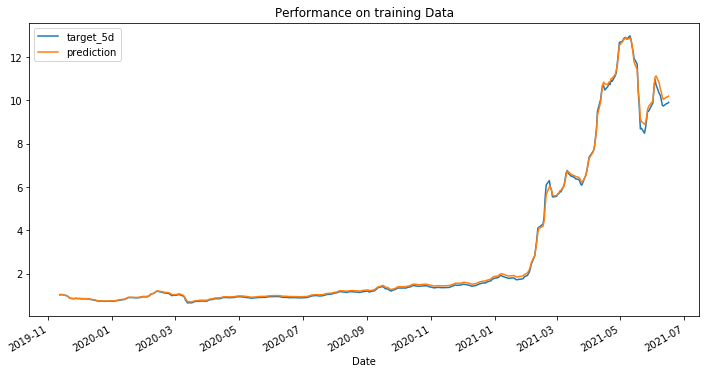

In [137]:
fix, ax = plt.subplots(figsize=(12,6))
(1+y_train).cumprod().plot(ax=ax, legend="target_5d")
(1 + pd.Series(rf.predict(X_train), index=y_train.index, name="prediction")).cumprod().plot(ax=ax, legend="prediction")
ax.set_title("Performance on training Data");

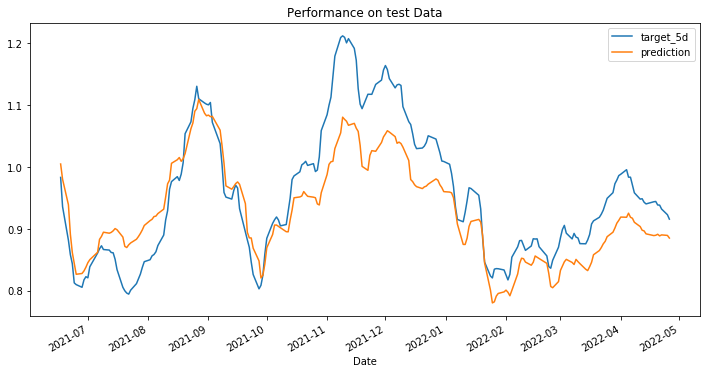

In [138]:
fix, ax = plt.subplots(figsize=(12,6))
(1+y_test).cumprod().plot(ax=ax, legend="target_5d")
(1 + pd.Series(rf.predict(X_test), index=y_test.index, name="prediction")).cumprod().plot(ax=ax, legend="prediction")
ax.set_title("Performance on test Data");

- The model was capable of predicting the evolution of the target

# 4.Alpha Signal 

The alpha signal is generated by the model for the bnb crypto is are the predictions of the model

In [141]:
alpha_vector = rf.predict(X_test)

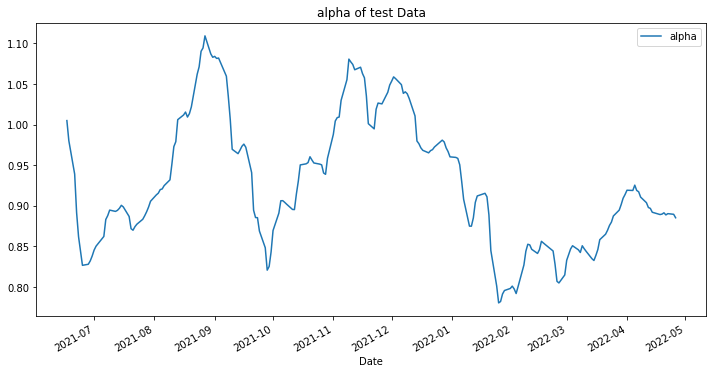

In [142]:
fix, ax = plt.subplots(figsize=(12,6))
(1 + pd.Series(alpha_vector, index=y_test.index, name="alpha")).cumprod().plot(ax=ax, legend="prediction")
ax.set_title("alpha of test Data");